(32, 1)
(32, 1)


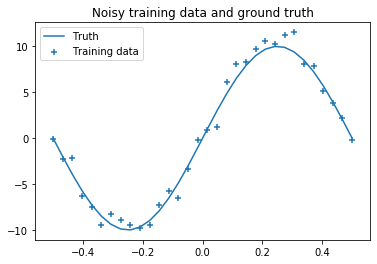

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, sigma):
    epsilon = np.random.randn(*x.shape) * sigma
    return 10 * np.sin(2 * np.pi * (x)) + epsilon

train_size = 32
noise = 1.0

X = np.linspace(-0.5, 0.5, train_size).reshape(-1, 1)
t = f(X, sigma=noise)
y_true = f(X, sigma=0.0)

print(X.shape)
print(t.shape)

plt.scatter(X, t, marker='+', label='Training data')
plt.plot(X, y_true, label='Truth')
plt.title('Noisy training data and ground truth')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp

In [3]:

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = tf.keras.layers.Dense(10)
        self.layer2 = tf.keras.layers.Dense(10)
        self.layer3 = tf.keras.layers.Dense(1)
        
    def call(self, x, t):
        # x : [batch, 1]
        # t : [batch, 1]
        
        y = self.layer1(x)
        y = tf.nn.relu(y)

        y = self.layer2(y)
        y = tf.nn.relu(y)
        
        y = self.layer3(y)
        
        dist = tfp.distributions.Normal(loc=y, scale=1.0)
        nll_loss = tf.reduce_sum(-dist.log_prob(t))
        #nll_loss = tf.reduce_sum((y - t)**2)
        total_loss = nll_loss
        
        return y, nll_loss
        
        

In [4]:
model = Model()
print(model)

optimizer = tf.keras.optimizers.Adam(1e-3)

In [5]:
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
t_tensor = tf.convert_to_tensor(t, dtype=tf.float32)

y, nll_loss = model(X_tensor, t_tensor)
print(y)

tf.Tensor(
[[0.05979678]
 [0.05593892]
 [0.05208107]
 [0.04822321]
 [0.04436535]
 [0.0405075 ]
 [0.03664964]
 [0.03279179]
 [0.02893393]
 [0.02507607]
 [0.02121821]
 [0.01736036]
 [0.0135025 ]
 [0.00964464]
 [0.00578679]
 [0.00192893]
 [0.00238508]
 [0.00715525]
 [0.01192542]
 [0.01669559]
 [0.02146575]
 [0.02623592]
 [0.03100608]
 [0.03577626]
 [0.04054642]
 [0.0453166 ]
 [0.05008676]
 [0.05485693]
 [0.0596271 ]
 [0.06439725]
 [0.06916743]
 [0.07393758]], shape=(32, 1), dtype=float32)


In [6]:
#@tf.function
def train_step(model, optimizer, X_tensor, t_tensor):
    
    with tf.GradientTape() as tape:
           
        y, nll_loss = model(X_tensor, t_tensor)
        
    gradient = tape.gradient(nll_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradient, model.trainable_variables))
    
    return y, nll_loss
        

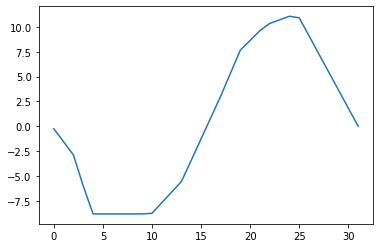

tf.Tensor(36.877964, shape=(), dtype=float32)
tf.Tensor(36.86618, shape=(), dtype=float32)
tf.Tensor(36.865597, shape=(), dtype=float32)
tf.Tensor(36.869907, shape=(), dtype=float32)
tf.Tensor(36.870667, shape=(), dtype=float32)
tf.Tensor(36.868942, shape=(), dtype=float32)
tf.Tensor(36.864574, shape=(), dtype=float32)
tf.Tensor(36.86659, shape=(), dtype=float32)
tf.Tensor(36.86729, shape=(), dtype=float32)
tf.Tensor(36.86324, shape=(), dtype=float32)
tf.Tensor(36.864647, shape=(), dtype=float32)
tf.Tensor(36.865273, shape=(), dtype=float32)
tf.Tensor(36.86399, shape=(), dtype=float32)
tf.Tensor(36.866302, shape=(), dtype=float32)
tf.Tensor(36.86583, shape=(), dtype=float32)
tf.Tensor(36.862434, shape=(), dtype=float32)
tf.Tensor(36.85563, shape=(), dtype=float32)
tf.Tensor(36.858284, shape=(), dtype=float32)
tf.Tensor(36.86465, shape=(), dtype=float32)
tf.Tensor(36.861576, shape=(), dtype=float32)
tf.Tensor(36.856792, shape=(), dtype=float32)
tf.Tensor(36.85811, shape=(), dtype=float3

KeyboardInterrupt: 

In [7]:
from IPython import display

while(True):
    
    for i in range(100):
        y, nll_loss = train_step(model, optimizer, X_tensor, t_tensor)
        print(nll_loss)
    
    display.clear_output()
    plt.plot(y[:, 0].numpy())
    plt.show()